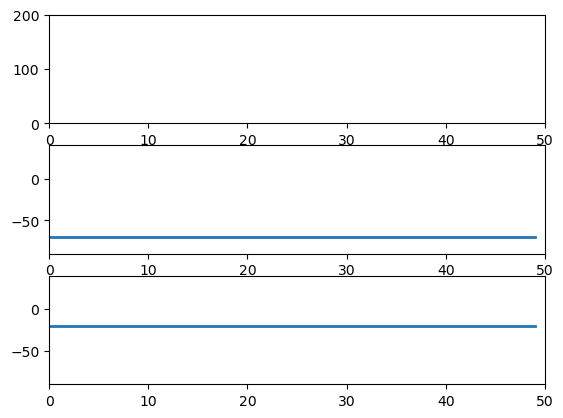

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import random

fig = plt.figure()
ax1 = fig.add_subplot(311, xlim=(0, 50), ylim=(0, 200))
ax2 = fig.add_subplot(312, xlim=(0, 50), ylim=(-90, 40))
ax3 = fig.add_subplot(313, xlim=(0, 50), ylim=(-90, 40))

max_point = 50
line, = ax1.plot(np.arange(max_point), np.ones(
    max_point, dtype=float)*np.nan, lw=2)
line2, = ax2.plot(np.arange(max_point), np.ones(
    max_point, dtype=float)*(-70), lw=2)
line3, = ax3.plot(np.arange(max_point), np.ones(
    max_point, dtype=float)*(-20), lw=2)

paused = False  # Initialize pause flag to False


In [38]:
def get_data_func():
    return random.randrange(50, 150)


def izhikevich(a, b, c, d):
    def model(old_Vu, I):
        V, u = old_Vu
        dV_dt = 0.04 * V ** 2 + 5 * V + 140 - u + I
        du_dt = a * (b * V - u)
        if V + dV_dt >= 30:  # Check if neuron has spiked
            V = c
            u = u + d
        else:
            V = V + dV_dt
            u = u + du_dt
        return [V, u]
    return model


model = izhikevich(0.02, 0.2, -65, 8)


In [39]:
def animate(i):
    global paused
    if paused:
        y = float(get_data_func())
        old_y = line.get_ydata()
        new_y = np.r_[old_y[1:], y]
        line.set_ydata(new_y)

        old_V = line2.get_ydata()
        old_u = line3.get_ydata()
        V, u = model([old_V[-1], old_u[-1]], y)
        new_V = np.r_[old_V[-1], V]
        new_u = np.r_[old_u[-1], u]
        line2.set_ydata(new_V)
        line3.set_ydata(new_u)
    else:
        y = 0
        old_y = line.get_ydata()
        new_y = np.r_[old_y[1:], y]
        line.set_ydata(new_y)

        old_V = line2.get_ydata()
        old_u = line3.get_ydata()
        V, u = model([old_V[-1], old_u[-1]], y)
        new_V = np.r_[old_V[-1], V]
        new_u = np.r_[old_u[-1], u]
        line2.set_ydata(new_V)
        line3.set_ydata(new_u)
    return line, line2, line3


In [40]:
def on_space_press(event):
    global paused
    if event.key == ' ':
        paused = True


def on_space_release(event):
    global paused
    if event.key == ' ':
        paused = False


anim = animation.FuncAnimation(
    fig, animate,
    init_func=lambda: (line, line2, line3),
    interval=20
)

c:\Users\JaehunKim\anaconda3\envs\SNN\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [41]:
fig.canvas.mpl_connect('key_press_event', on_space_press)
fig.canvas.mpl_connect('key_release_event', on_space_release)

plt.show()
